In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [46]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Machine-Learning-2023/refs/heads/main/economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [47]:
df.shape

(24, 6)

In [48]:
df2=df.drop(['Unnamed: 0','year','month'], axis=1)
df2.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [49]:
x=df2.drop('index_price',axis=1)
y=df2.index_price
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

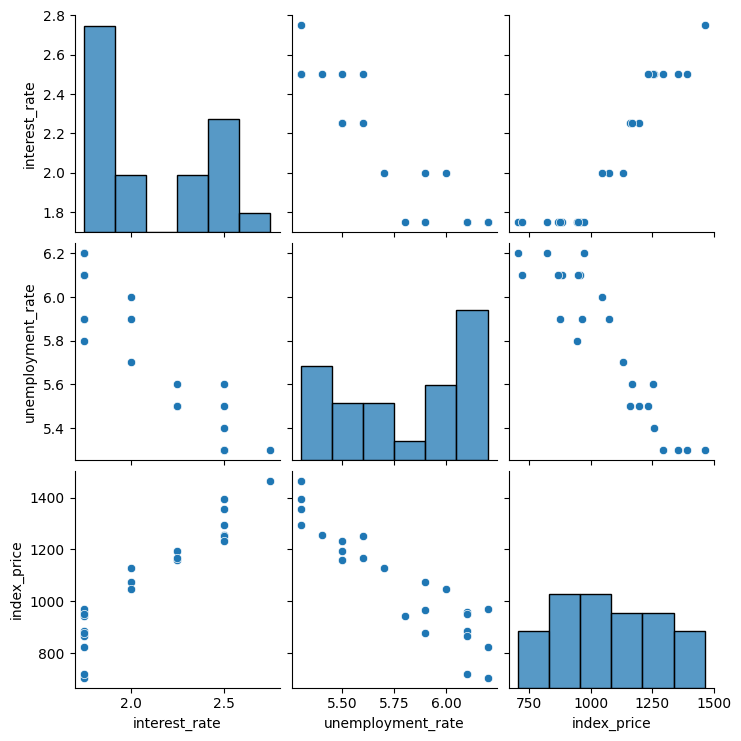

In [50]:
sb.pairplot(df2)

In [51]:
df2.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
type(x_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

<Axes: xlabel='interest_rate', ylabel='index_price'>

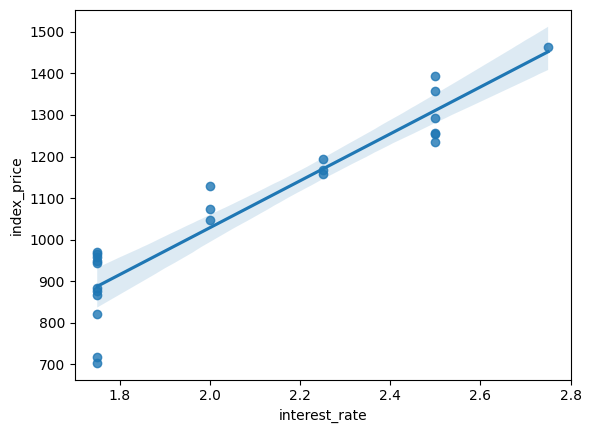

In [54]:
sb.regplot(x=df2.interest_rate,y=df2.index_price)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

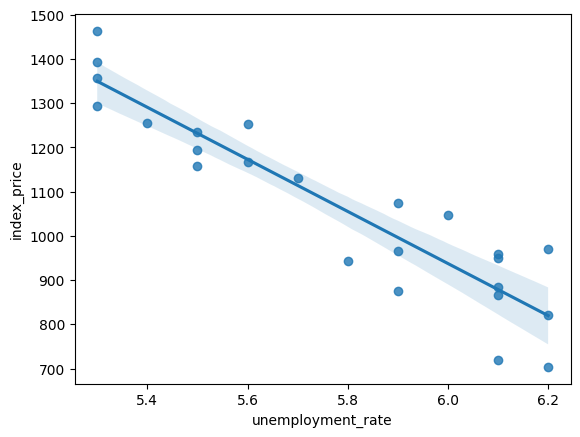

In [55]:
sb.regplot(x=df2.unemployment_rate,y=df2.index_price)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [57]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [58]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [59]:
model.fit(x_train,y_train)

LinearRegression()

In [60]:
model.coef_, model.intercept_ #These parameters are accessible after the fit() operation is performed

(array([115.74776453, -67.43154829]), np.float64(1081.421052631579))

In [61]:
from sklearn.model_selection import cross_validate

In [62]:
validate=cross_validate(model,x_train,y_train,cv=5)
validate

{'fit_time': array([0.        , 0.00237918, 0.00230598, 0.00099874, 0.00218749]),
 'score_time': array([0.00409794, 0.00211835, 0.00247622, 0.0014472 , 0.00285101]),
 'test_score': array([0.87170464, 0.86097585, 0.97605755, 0.91383258, 0.75592903])}

In [63]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.8664052381808911

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse,mae

(8949.887159595202, 81.31914270656448)

<Axes: xlabel='index_price', ylabel='Count'>

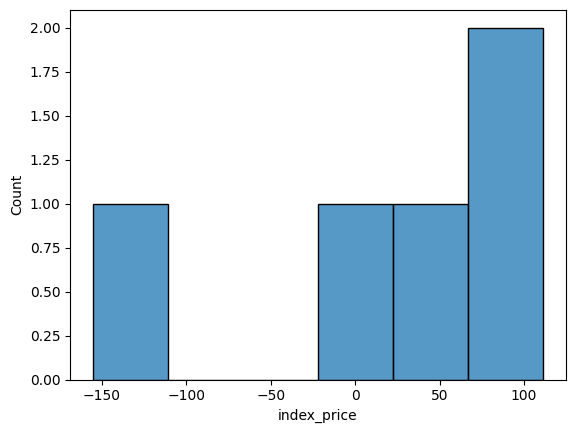

In [66]:
sb.histplot(y_test-y_pred,bins=6)

<Axes: xlabel='index_price', ylabel='Density'>

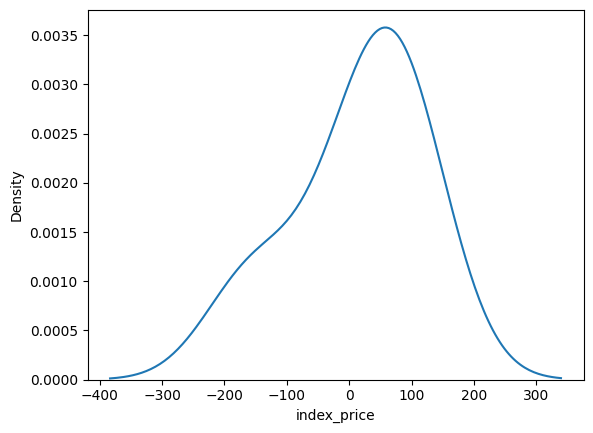

In [67]:
sb.kdeplot(y_test-y_pred)

In [68]:
from statsmodels.api import OLS
model=OLS(y_train,x_train).fit()

In [69]:
model.predict(x_test)

array([ -23.3855663 , -221.95317186, -199.96137002,  330.40743012,
       -221.95317186])

In [70]:
model.summary()

d:\ML\3\env\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):             -0.088
Method:                 Least Squares   F-statistic:                             0.2341
Date:                Sat, 04 Jan 2025   Prob (F-statistic):                       0.794
Time:                        05:27:37   Log-Likelihood:                         -159.72
No. Observations:                  19   AIC:                                      323.4
Df Residuals:                      17   BIC:                                      325.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           115.7478    666.701      0.174      0.864   -1290.868    1522.364
x2           -67.4315    666.701     -0.101      0.921   -1474.048    1339.184
==============================================================================
Omnibus:                        6.208   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                3.615
Skew:                          -0.894   Prob(JB):                        0.164
Kurtosis:                       4.172   Cond. No.                         4.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""